<a href="https://colab.research.google.com/github/Meyyaou/pythondaily/blob/main/STEP3-Visualisation/AnalysisDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#step1: read the file
df=pd.read_csv('/content/Thyroid_Diff.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [3]:
#step2: etude and know what to search(var of results) => if structured/not
df.dtypes
df['Response'].value_counts()
#does that mean these rows are duplicated and we should drop them
#df[df.duplicated(keep=False)==True]

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [5]:
df['Risk'].value_counts()

Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64

In [6]:
#step3: verif nan vals/outline analysis(= noise data => drop them)
df.isnull().sum()
#no nan vals

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
#step4: normalize data
#format all binary var to 0 and 1 0=> yes 1 => no
#Smoking	Hx Smoking	Hx Radiothreapy Recurred
df= df.replace({'No': 1, 'Yes': 0})

df['Adenopathy'].replace(1, 'No', inplace=True)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,1,1,1,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,1
1,34,F,1,0,1,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,1
2,30,F,1,1,1,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,1
3,62,F,1,1,1,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,1
4,62,F,1,1,1,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,1


In [26]:
#to encode qualitive cols we use get_dummies which converts categorical data into dummy or indicator variables.
#Thyroid Function Physical Examination Adenopathy Pathology Focality Risk T N M Stage Response Gender
df = pd.get_dummies(data=df, columns=['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology','Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Gender'])
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 53 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Age                                               383 non-null    int64 
 1   Smoking                                           383 non-null    object
 2   Hx Smoking                                        383 non-null    object
 3   Hx Radiothreapy                                   383 non-null    object
 4   Recurred                                          383 non-null    object
 5   Thyroid Function_Clinical Hyperthyroidism         383 non-null    bool  
 6   Thyroid Function_Clinical Hypothyroidism          383 non-null    bool  
 7   Thyroid Function_Euthyroid                        383 non-null    bool  
 8   Thyroid Function_Subclinical Hyperthyroidism      383 non-null    bool  
 9   Thyroid Function_Subclinical Hyp

In [27]:
variables = [col for col in df.columns if df[col].dtype in [int, float, bool]]

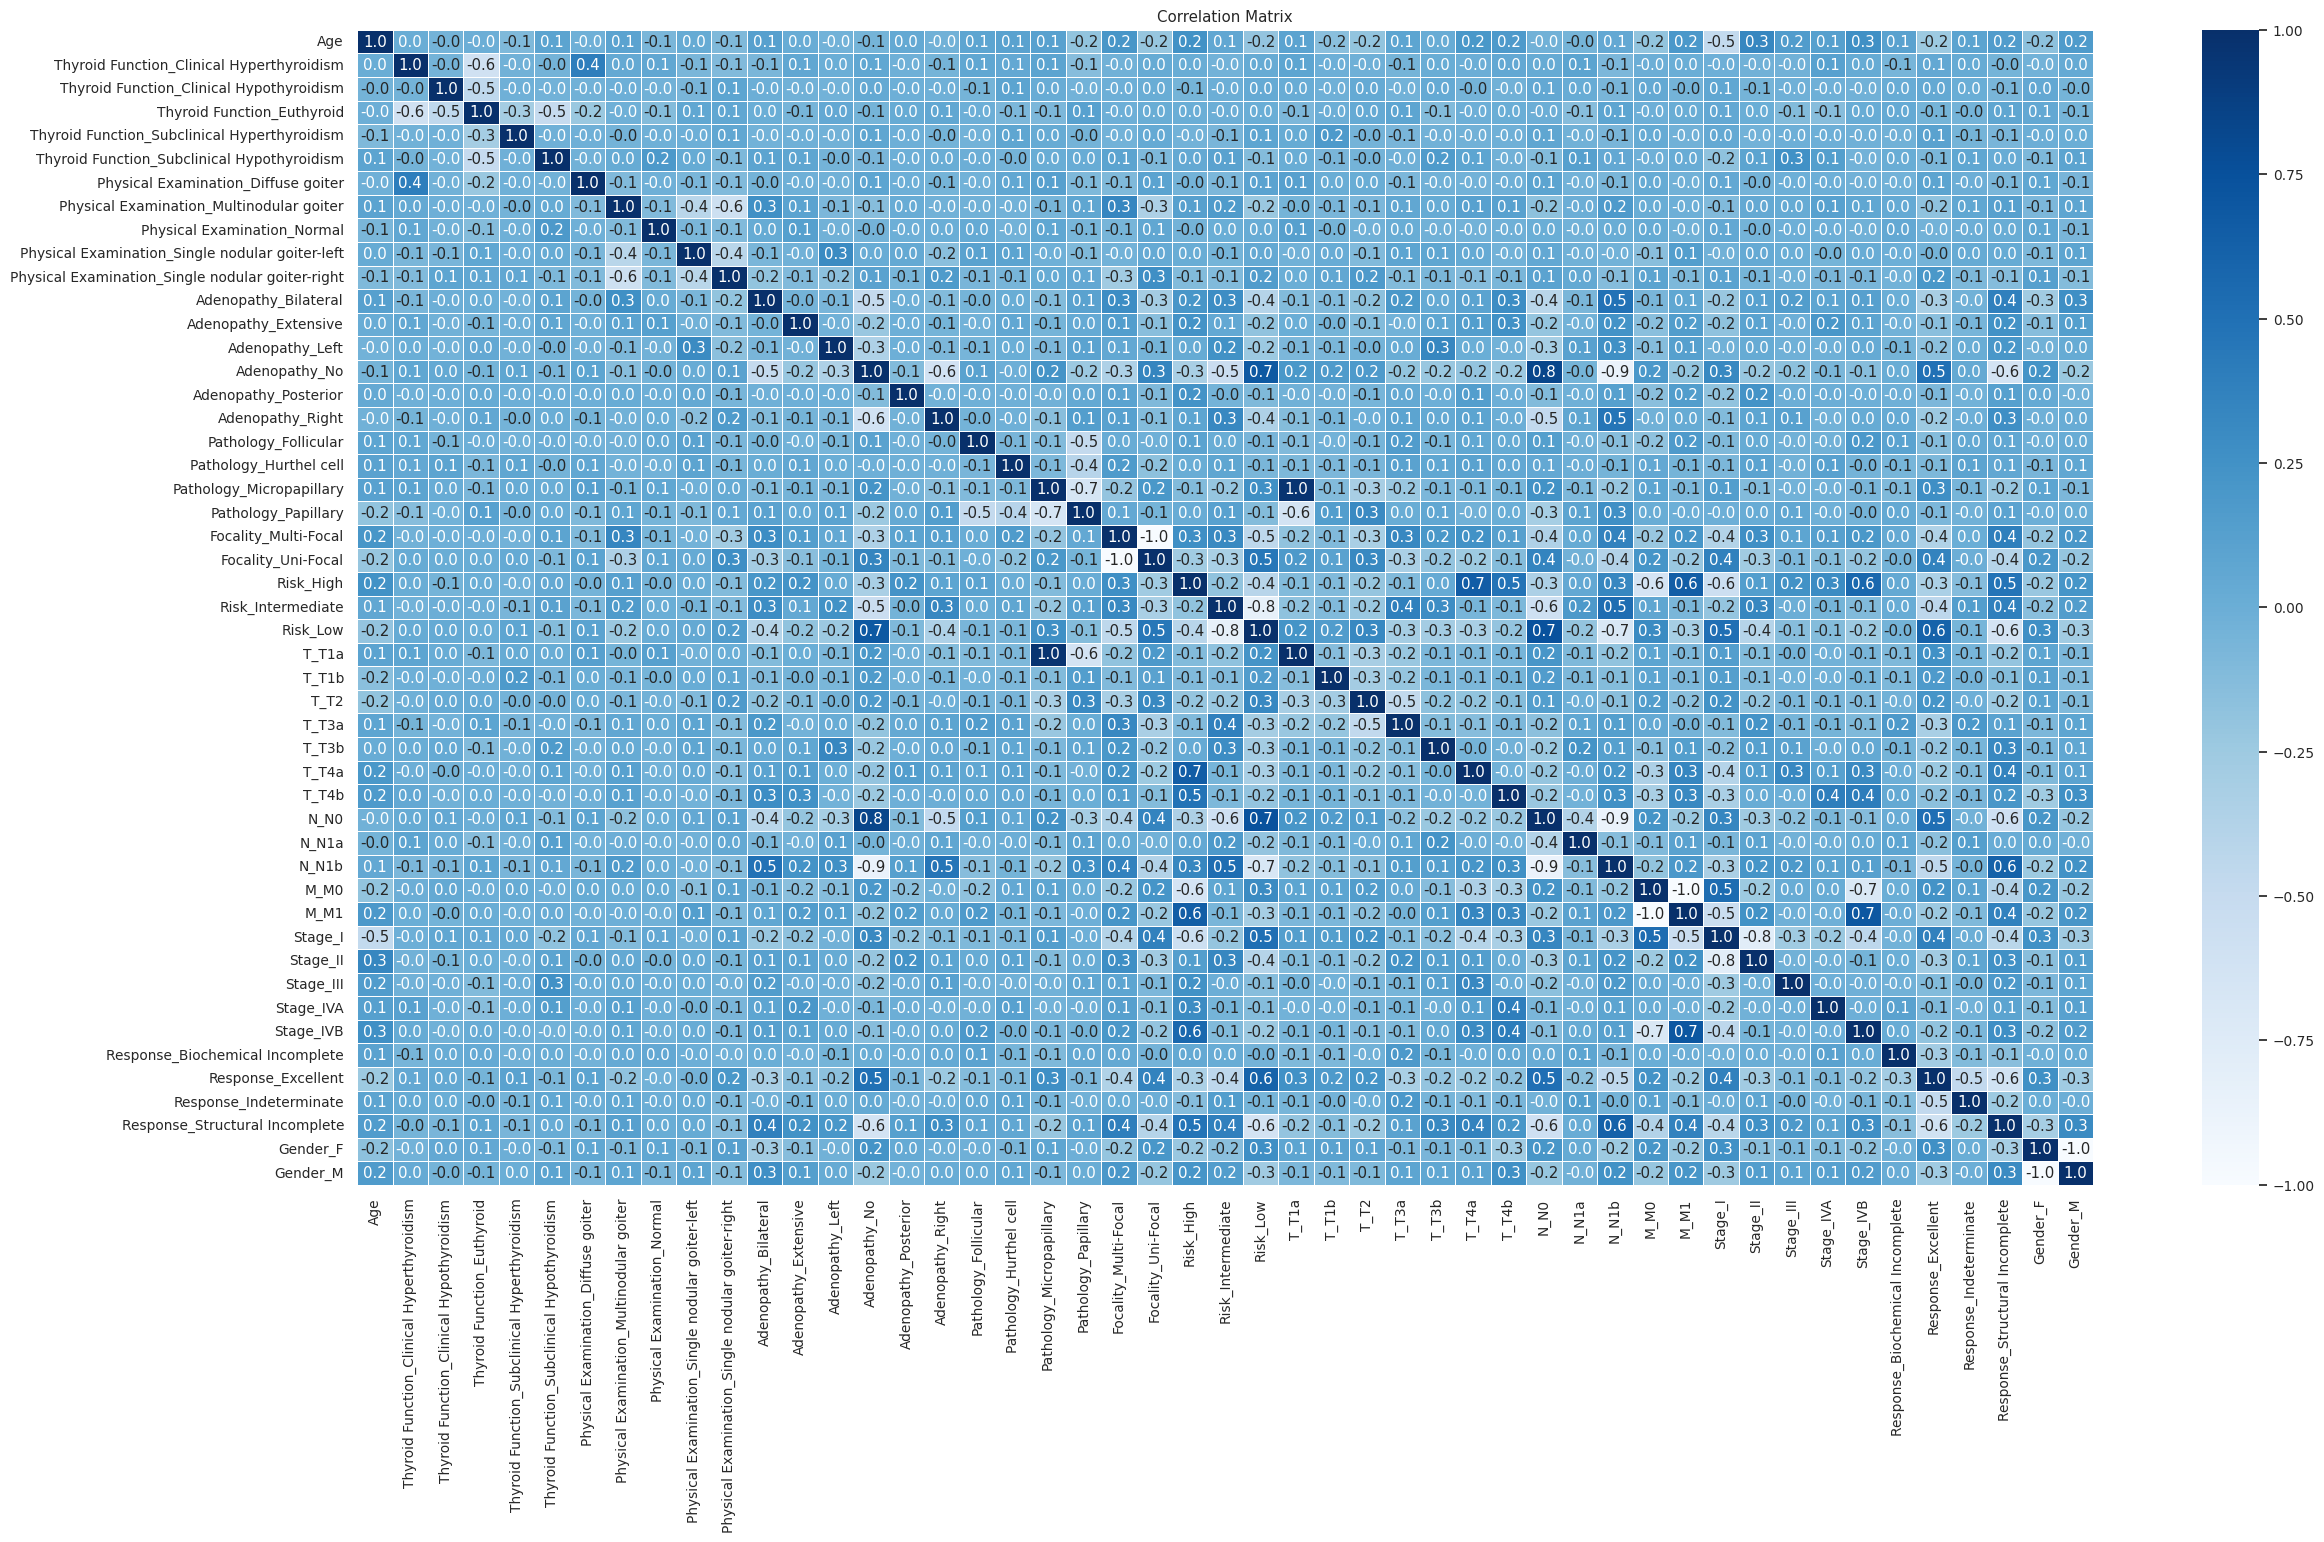

In [41]:
#step5: verif correlation w/spearman car var ordinales
sns.set(font_scale=0.9)
df_heat=df[variables]
corr= df_heat.corr(method='spearman')
fig=plt.figure(figsize=(28,15))
sns.heatmap(data=corr, annot=True,fmt='.1f', cmap='Blues', center=0, square=False, linewidths=.5)
plt.title('Correlation Matrix')
fig.savefig('heatmap_correlation.png')
plt.show()

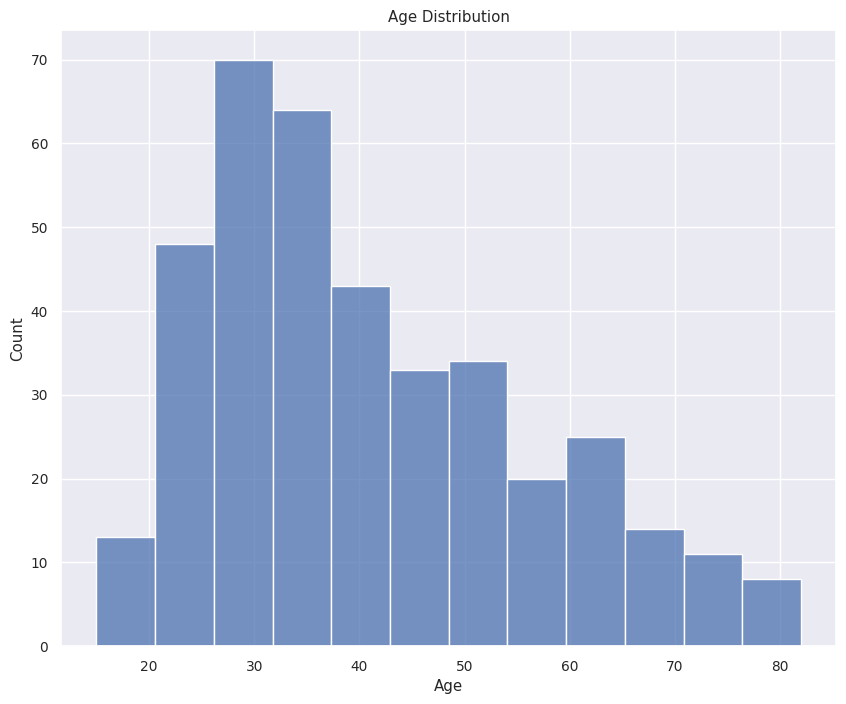

In [43]:
#step6: other basic plot?
#distrib des vars (hist)

#age
fig=plt.figure(figsize=(10,8))
sns.histplot(df['Age'])
plt.title('Age Distribution')
fig.savefig('age_distribution.png')
plt.show()

In [ ]:
#regression logistic

In [ ]:
#survie?

In [ ]:
#interactions

In [ ]:
#decision tree & random forest

In [ ]:
#qsts: Facteurs de Risque
